In [113]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt 

In [114]:
datatrain = pd.read_csv('train.csv')
datatrain.shape

(14447, 11)

In [115]:
datatrain.head()

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,9744,-121.65,36.77,15,2191,358.0,1150,330,4.7969,227500.0,<1H OCEAN
1,13893,-116.27,34.13,37,452,109.0,184,59,3.7292,65800.0,INLAND
2,18277,-122.07,37.34,35,1172,184.0,512,175,7.3561,500001.0,<1H OCEAN
3,16176,-122.39,37.74,52,126,24.0,37,27,10.2264,225000.0,NEAR BAY
4,8843,-118.38,34.09,28,4001,1352.0,1799,1220,2.5784,272900.0,<1H OCEAN


In [116]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14447 entries, 0 to 14446
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  14447 non-null  int64  
 1   longitude           14447 non-null  float64
 2   latitude            14447 non-null  float64
 3   housing_median_age  14447 non-null  int64  
 4   total_rooms         14447 non-null  int64  
 5   total_bedrooms      14310 non-null  float64
 6   population          14447 non-null  int64  
 7   households          14447 non-null  int64  
 8   median_income       14447 non-null  float64
 9   median_house_value  14447 non-null  float64
 10  ocean_proximity     14447 non-null  object 
dtypes: float64(5), int64(5), object(1)
memory usage: 1.2+ MB


In [117]:
datatrain.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
14442    False
14443    False
14444    False
14445    False
14446    False
Length: 14447, dtype: bool

##### no hay valores nulos 

In [118]:
datatrain.isnull().any(axis=1).sum()

137

In [119]:
total = datatrain.isnull().sum().sort_values(ascending = False)
percent = (datatrain.isnull().sum() / datatrain.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data

,Total,Percent
total_bedrooms,137,0.009483
id,0,0.000000
longitude,0,0.000000
latitude,0,0.000000
housing_median_age,0,0.000000
total_rooms,0,0.000000
population,0,0.000000
households,0,0.000000
median_income,0,0.000000
median_house_value,0,0.000000


In [120]:
households = StandardScaler().fit_transform(datatrain['households'][:,np.newaxis]);
low_range = households[households[:,0].argsort()][:10]
high_range = households[households[:,0].argsort()][-10:]
print('Fuera de la distribución (por debajo):')
print(low_range)
print('\nFuera de la distribución (por arriba):')
print(high_range)

Fuera de la distribución (por debajo):
[[-1.29248416]
 [-1.28989461]
 [-1.28989461]
 [-1.28989461]
 [-1.28730507]
 [-1.28730507]
 [-1.28471553]
 [-1.28212599]
 [-1.28212599]
 [-1.28212599]]

Fuera de la distribución (por arriba):
[[ 9.24954388]
 [ 9.59136351]
 [ 9.94095176]
 [10.3319727 ]
 [11.27715576]
 [11.47137146]
 [11.78211657]
 [12.142063  ]
 [12.5796957 ]
 [14.45452456]]


C:\Users\50233\AppData\Local\Temp\ipykernel_6260\2674294140.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  households = StandardScaler().fit_transform(datatrain['households'][:,np.newaxis]);


In [121]:
datatrain['households'].describe()

count    14447.000000
mean       500.116772
std        386.181946
min          1.000000
25%        280.000000
50%        408.000000
75%        604.500000
max       6082.000000
Name: households, dtype: float64

In [122]:
sns.distplot(datatrain['households']);

c:\Users\50233\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [123]:
corrmat = datatrain.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

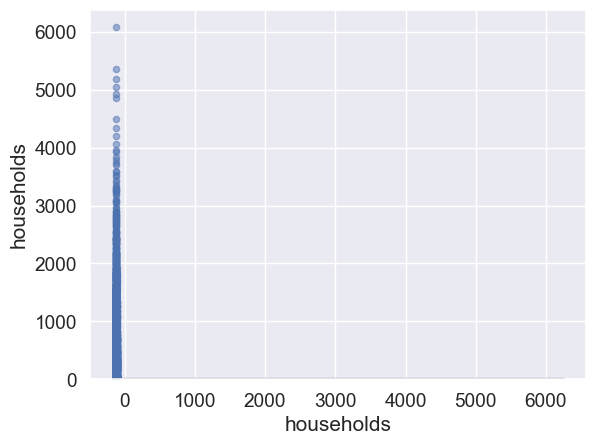

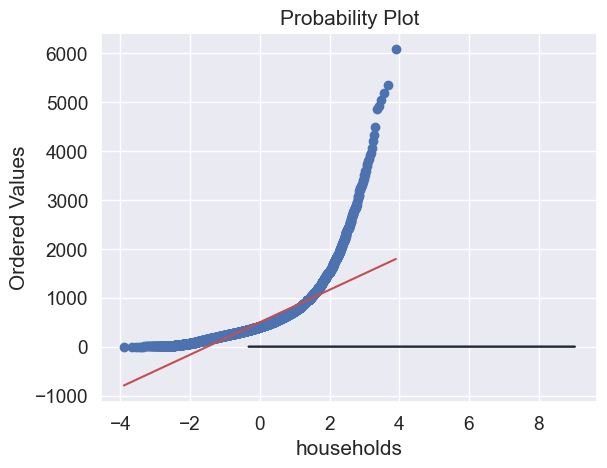

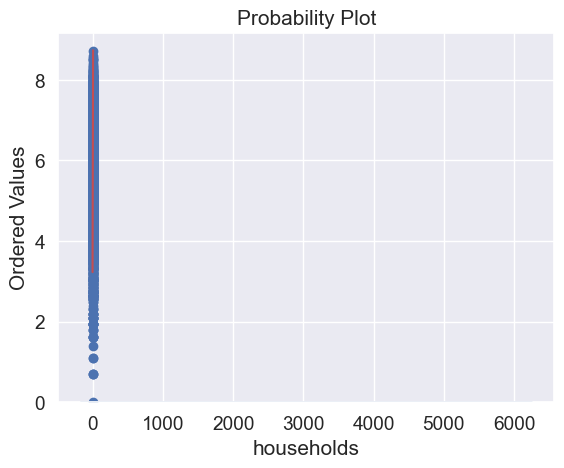

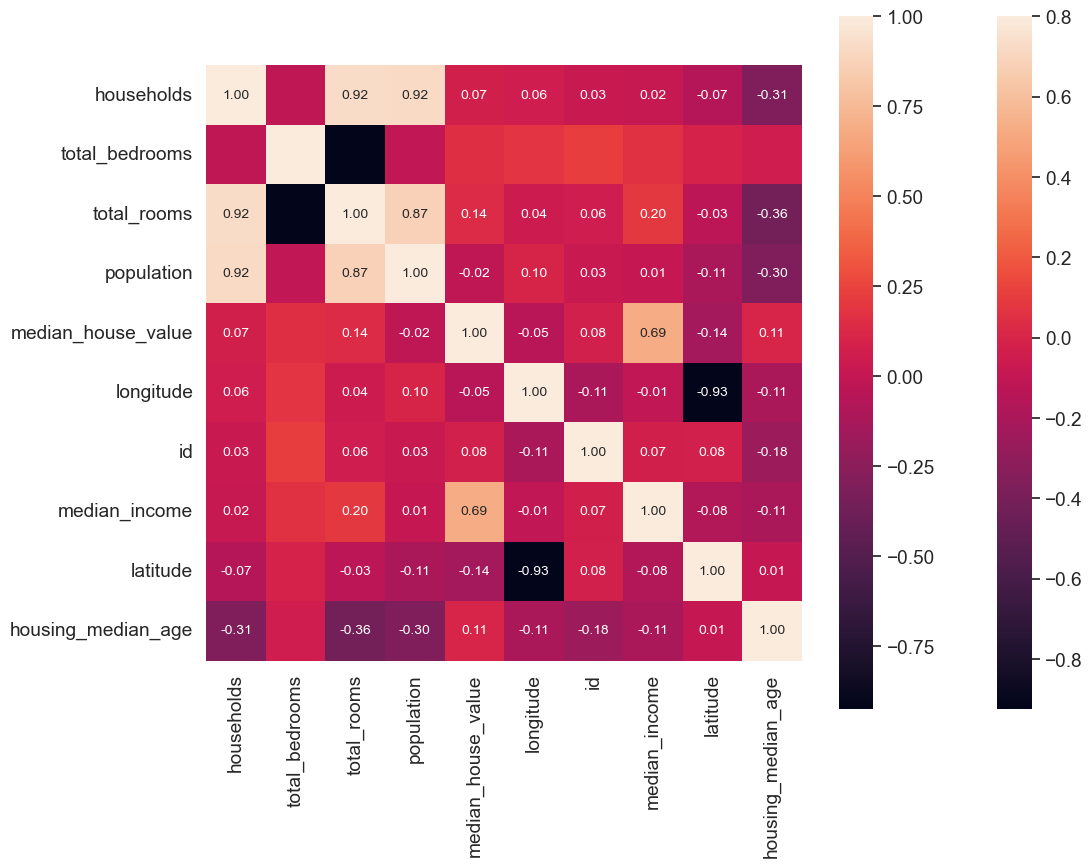

In [124]:
k = 10 # Número de variables.
cols = corrmat.nlargest(k, 'households')['households'].index
cm = np.corrcoef(datatrain[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [125]:
var = 'longitude'
data = pd.concat([datatrain['households'], datatrain[var]], axis = 1)
data.plot.scatter(x = var, y = 'households', alpha = 0.5);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


In [126]:
sns.distplot(datatrain['households'], fit = norm);
fig = plt.figure()
res = stats.probplot(datatrain['households'], plot = plt)

c:\Users\50233\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [127]:
datatrain['households'] = np.log(datatrain['households'])

In [128]:
sns.distplot(datatrain['households'], fit = norm);
fig = plt.figure()
res = stats.probplot(datatrain['households'], plot = plt)

c:\Users\50233\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [129]:
datatrain['longitude'] = np.log(datatrain['longitude'])

c:\Users\50233\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [130]:
y_train = datatrain.pop('longitude')
X_train = datatrain

In [135]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression